**20L-0961**

In [1]:
# Install necessary libraries
!pip install -q torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.1 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# traininig time logs
import time

In [3]:
# Download and load MNIST Digits dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset_digits = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset_digits = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Download and load MNIST Fashion dataset
trainset_fashion = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset_fashion = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 506kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.90MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 26.4M/26.4M [00:02<00:00, 8.84MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.0MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



# Part 1
## Exploratory Data Analysis (EDA)

MNIST Digits Dataset:
Training samples: 60000
Testing samples: 10000

MNIST Fashion Dataset:
Training samples: 60000
Testing samples: 10000

MNIST Digits Classes: 10
Class 0: 0
Class 1: 1
Class 2: 2
Class 3: 3
Class 4: 4
Class 5: 5
Class 6: 6
Class 7: 7
Class 8: 8
Class 9: 9

MNIST Fashion Classes: 10
Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


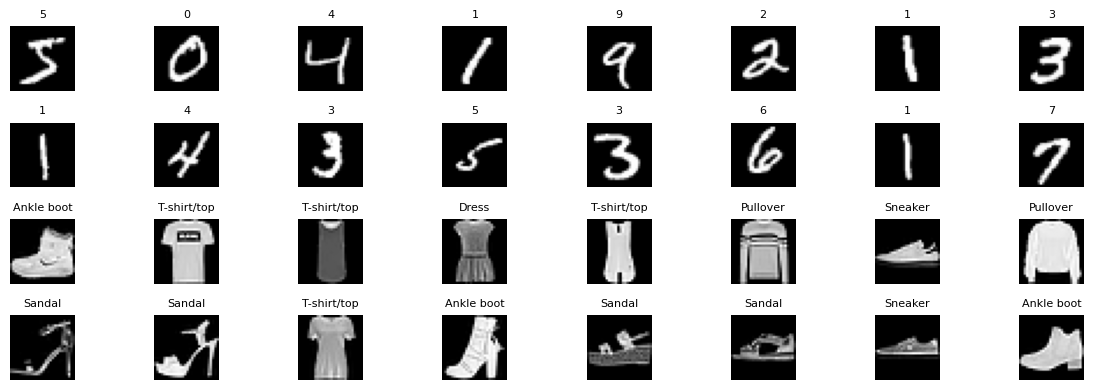

In [4]:
# 1. Display dataset information
print("MNIST Digits Dataset:")
print(f"Training samples: {len(trainset_digits)}")
print(f"Testing samples: {len(testset_digits)}")
print("\nMNIST Fashion Dataset:")
print(f"Training samples: {len(trainset_fashion)}")
print(f"Testing samples: {len(testset_fashion)}")

# 2. Class labels
digits_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\nMNIST Digits Classes:", len(digits_classes))
for i, label in enumerate(digits_classes):
    print(f"Class {i}: {label}")

print("\nMNIST Fashion Classes:", len(fashion_classes))
for i, label in enumerate(fashion_classes):
    print(f"Class {i}: {label}")

# 3. Display sample images from both datasets
fig = plt.figure(figsize=(12, 4))

# Display MNIST Digits samples
grid_size = 4
for i in range(grid_size * grid_size):
    ax = plt.subplot(grid_size, grid_size * 2, i + 1)
    plt.imshow(trainset_digits[i][0].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(digits_classes[trainset_digits[i][1]], fontsize=8)
    ax.set_frame_on(False)

# Display Fashion MNIST samples
for i in range(grid_size * grid_size):
    ax = plt.subplot(grid_size, grid_size * 2, i + grid_size * grid_size + 1)
    plt.imshow(trainset_fashion[i][0].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(fashion_classes[trainset_fashion[i][1]], fontsize=8)
    ax.set_frame_on(False)

# wrap the grid in a tight layout
plt.tight_layout()
plt.show()

# Part 2
## Implementing Generative Adversarial Networks (GANs)

In [5]:
# Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Initial layer
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            # Hidden Layers
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            # Output layer
            nn.Linear(1024, 784), # 28x28 = 784
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input layer
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            # Hidden layer
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            # Output layer
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1, 784)


## GAN training on digits

Epoch [1/100], Step [100/938], d_loss: 1.2874, g_loss: 0.7798
Epoch [1/100], Step [200/938], d_loss: 1.2751, g_loss: 0.8488
Epoch [1/100], Step [300/938], d_loss: 1.1412, g_loss: 0.8409
Epoch [1/100], Step [400/938], d_loss: 0.8425, g_loss: 1.1967
Epoch [1/100], Step [500/938], d_loss: 1.0853, g_loss: 1.5395
Epoch [1/100], Step [600/938], d_loss: 0.9086, g_loss: 1.7413
Epoch [1/100], Step [700/938], d_loss: 0.9877, g_loss: 1.0890
Epoch [1/100], Step [800/938], d_loss: 1.4427, g_loss: 1.8272
Epoch [1/100], Step [900/938], d_loss: 0.6064, g_loss: 2.0179
Epoch [2/100], Step [100/938], d_loss: 0.6975, g_loss: 2.3055
Epoch [2/100], Step [200/938], d_loss: 1.0212, g_loss: 1.4251
Epoch [2/100], Step [300/938], d_loss: 1.2495, g_loss: 3.9084
Epoch [2/100], Step [400/938], d_loss: 0.6517, g_loss: 1.7489
Epoch [2/100], Step [500/938], d_loss: 0.7776, g_loss: 1.4906
Epoch [2/100], Step [600/938], d_loss: 1.1059, g_loss: 2.6653
Epoch [2/100], Step [700/938], d_loss: 0.8682, g_loss: 1.0271
Epoch [2

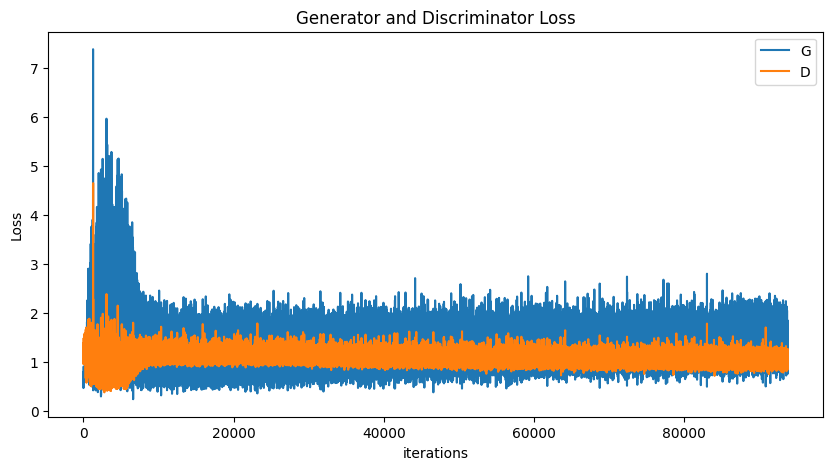

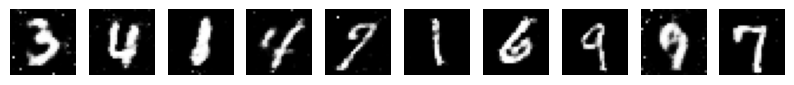

<ipython-input-26-2fafbe2839b0>:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load('generator.pth'))
<ipython-input-26-2fafbe2839b0>:118

Epoch [1/100], Step [100/106], d_loss: 1.1660, g_loss: 2.2922
Epoch [2/100], Step [100/106], d_loss: 1.2846, g_loss: 1.7015
Epoch [3/100], Step [100/106], d_loss: 1.2388, g_loss: 1.0661
Epoch [4/100], Step [100/106], d_loss: 1.2633, g_loss: 1.0122
Epoch [5/100], Step [100/106], d_loss: 1.1731, g_loss: 1.1528
Epoch [6/100], Step [100/106], d_loss: 1.4260, g_loss: 1.0056
Epoch [7/100], Step [100/106], d_loss: 1.2098, g_loss: 1.0724
Epoch [8/100], Step [100/106], d_loss: 1.2444, g_loss: 0.7304
Epoch [9/100], Step [100/106], d_loss: 1.3482, g_loss: 0.9769
Epoch [10/100], Step [100/106], d_loss: 1.4492, g_loss: 0.6139
Epoch [11/100], Step [100/106], d_loss: 1.3166, g_loss: 0.9200
Epoch [12/100], Step [100/106], d_loss: 1.3077, g_loss: 0.9896
Epoch [13/100], Step [100/106], d_loss: 1.2940, g_loss: 0.8202
Epoch [14/100], Step [100/106], d_loss: 1.3173, g_loss: 0.7642
Epoch [15/100], Step [100/106], d_loss: 1.3268, g_loss: 0.9197
Epoch [16/100], Step [100/106], d_loss: 1.3882, g_loss: 0.7798
E

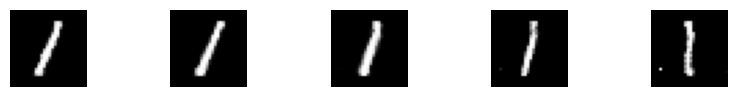

In [26]:
# Training parameters
latent_dim = 100
batch_size = 64
num_epochs = 100
lr = 0.0002
beta1 = 0.5

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize networks
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

def train_loop(dataloader, discriminator, generator, d_optimizer, g_optimizer, criterion, latent_dim, device):
    G_losses = []
    D_losses = []

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)

            # Train Discriminator
            d_optimizer.zero_grad()
            label_real = torch.ones(batch_size, 1).to(device)
            label_fake = torch.zeros(batch_size, 1).to(device)

            output_real = discriminator(real_images)
            d_loss_real = criterion(output_real, label_real)

            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            output_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(output_fake, label_fake)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            output = discriminator(fake_images)
            g_loss = criterion(output, label_real)
            g_loss.backward()
            g_optimizer.step()

            if (i+1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], "
                      f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

            G_losses.append(g_loss.item())
            D_losses.append(d_loss.item())

    return G_losses, D_losses

start_time = time.time()
G_losses, D_losses = train_loop(dataloader, discriminator, generator, d_optimizer, g_optimizer, criterion, latent_dim, device)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")
# Plot loss curves
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generate and save images
def generate_images(num_images=10):
    with torch.no_grad():
        noise = torch.randn(num_images, latent_dim).to(device)
        fake_images = generator(noise)
        fake_images = fake_images.cpu().numpy()

        plt.figure(figsize=(10, 1))
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

# Generate 10 images
generate_images(10)

# Save the model checkpoints
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

#####################################################################

# Train new GAN to produce digit 1 for 0961
digit = 1  # Change this for different digits
digit_indices = mnist_dataset.targets == digit
digit_dataset = torch.utils.data.Subset(mnist_dataset, torch.where(digit_indices)[0])
digit_loader = DataLoader(digit_dataset, batch_size=batch_size, shuffle=True)

# load last models
generator.load_state_dict(torch.load('generator.pth'))
discriminator.load_state_dict(torch.load('discriminator.pth'))

G_losses = []
D_losses = []

start_time = time.time()
G_losses, D_losses = train_loop(digit_loader, discriminator, generator, d_optimizer, g_optimizer, criterion, latent_dim, device)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

def generate_images(num_images=5):
    with torch.no_grad():
        noise = torch.randn(num_images, latent_dim).to(device)
        fake_images = generator(noise)
        fake_images = fake_images.cpu().numpy()

        plt.figure(figsize=(10, 1))
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

generate_images(5)

## GAN training on fashion mnist

Streaming output truncated to the last 5000 lines.
Epoch [47/100], Batch [78/94], d_loss: 1.2637, g_loss: 0.8472
Epoch [47/100], Batch [79/94], d_loss: 1.3231, g_loss: 1.0160
Epoch [47/100], Batch [80/94], d_loss: 1.2861, g_loss: 0.8290
Epoch [47/100], Batch [81/94], d_loss: 1.3072, g_loss: 0.9898
Epoch [47/100], Batch [82/94], d_loss: 1.3162, g_loss: 0.8451
Epoch [47/100], Batch [83/94], d_loss: 1.2988, g_loss: 0.9584
Epoch [47/100], Batch [84/94], d_loss: 1.3310, g_loss: 0.8988
Epoch [47/100], Batch [85/94], d_loss: 1.2744, g_loss: 0.8334
Epoch [47/100], Batch [86/94], d_loss: 1.2816, g_loss: 1.0113
Epoch [47/100], Batch [87/94], d_loss: 1.2599, g_loss: 0.9305
Epoch [47/100], Batch [88/94], d_loss: 1.2962, g_loss: 0.9092
Epoch [47/100], Batch [89/94], d_loss: 1.2560, g_loss: 1.0117
Epoch [47/100], Batch [90/94], d_loss: 1.3154, g_loss: 0.7322
Epoch [47/100], Batch [91/94], d_loss: 1.3653, g_loss: 1.0493
Epoch [47/100], Batch [92/94], d_loss: 1.3268, g_loss: 0.8700
Epoch [47/100], Bat

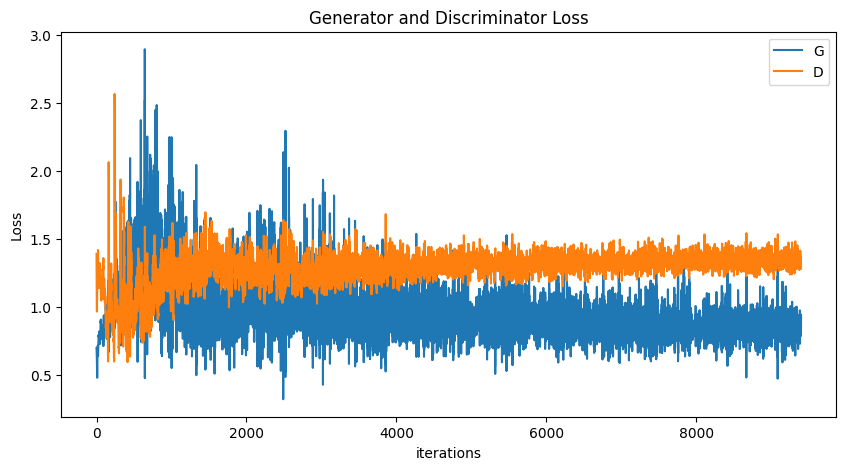

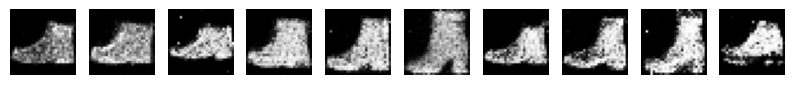

In [7]:
# Training parameters
latent_dim = 100
batch_size = 64
num_epochs = 100
lr = 0.0002
beta1 = 0.5

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize networks
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# For Fashion-MNIST (Shoes)
fashion_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                   transform=transform, download=True)
# Filter for shoes (class 9)
shoe_indices = fashion_dataset.targets == 9
shoe_dataset = torch.utils.data.Subset(fashion_dataset,
                                     torch.where(shoe_indices)[0])
shoe_loader = DataLoader(shoe_dataset, batch_size=batch_size, shuffle=True)

def train_loop(dataloader, discriminator, generator, d_optimizer, g_optimizer, criterion, latent_dim, device):
    G_losses = []
    D_losses = []

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)

            # Train Discriminator
            d_optimizer.zero_grad()
            label_real = torch.ones(batch_size, 1).to(device)
            label_fake = torch.zeros(batch_size, 1).to(device)

            output_real = discriminator(real_images)
            d_loss_real = criterion(output_real, label_real)

            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)
            output_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(output_fake, label_fake)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            d_optimizer.step()

            # Train Generator
            g_optimizer.zero_grad()
            output = discriminator(fake_images)
            g_loss = criterion(output, label_real)
            g_loss.backward()
            g_optimizer.step()

            # Print every batch
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], '
                  f'd_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

            G_losses.append(g_loss.item())
            D_losses.append(d_loss.item())

    return G_losses, D_losses

# Call the training function
start_time = time.time()
G_losses, D_losses = train_loop(shoe_loader, discriminator, generator, d_optimizer, g_optimizer, criterion, latent_dim, device)
end_time = time.time()
print(f"Total time taken: {end_time - start_time:.2f} seconds")

# Plot loss curves
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

with torch.no_grad():
    noise = torch.randn(10, latent_dim).to(device)
    fake_images = generator(noise)
    fake_images = fake_images.cpu().numpy()

    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()


# Part 3
## Implementing Variational Autoencoders (VAEs)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
# training time logs
import time

# VAE Model
class VAE(nn.Module):
    def __init__(self, latent_dim=10):
        super(VAE, self).__init__()
        ######################
        # 1 Input image → Encoder → (μ, log(σ²))
        # Encoder uses 2 conv layer to reduce dim
        self.enc_conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)  # 28x28 -> 14x14
        self.enc_conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)  # 14x14 -> 7x7
        self.enc_fc1 = nn.Linear(32 * 7 * 7, 128) # flatten and process

        # Latent space mappings
        self.enc_mu = nn.Linear(128, latent_dim) # mean vector
        self.enc_logvar = nn.Linear(128, latent_dim) # Log variance vector
        ######################

        # Decoder, mirror of encoder
        self.dec_fc1 = nn.Linear(latent_dim, 128)
        self.dec_fc2 = nn.Linear(128, 32 * 7 * 7)
        self.dec_conv1 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1)

    def encode(self, x):
        x = F.relu(self.enc_conv1(x)) # Conv2d RELU
        x = F.relu(self.enc_conv2(x))
        x = x.view(-1, 32 * 7 * 7)    # flatten dimensions
        x = F.relu(self.enc_fc1(x))
        return self.enc_mu(x), self.enc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar) #logvar to std
        eps = torch.randn_like(std)   #sample from std
        return mu + eps * std

    def decode(self, z):
        # ConvTranspose2d RELU
        x = F.relu(self.dec_fc1(z)) # 3 z → Decoder → Reconstructed image
        x = F.relu(self.dec_fc2(x))
        x = x.view(-1, 32, 7, 7)
        x = F.relu(self.dec_conv1(x))
        x = torch.sigmoid(self.dec_conv2(x)) # output between 0 to 1
        return x

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar) # 2 Reparameterization → Latent vector z
        return self.decode(z), mu, logvar

# Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')     #recon loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) #kld
    return BCE + KLD

## VAE training on digits

Train Epoch: 0 [0/60000 (0%)]	Loss: 655.600708
Train Epoch: 0 [1280/60000 (2%)]	Loss: 619.500000
Train Epoch: 0 [2560/60000 (4%)]	Loss: 494.814850
Train Epoch: 0 [3840/60000 (6%)]	Loss: 322.379578
Train Epoch: 0 [5120/60000 (9%)]	Loss: 260.885681
Train Epoch: 0 [6400/60000 (11%)]	Loss: 229.122665
Train Epoch: 0 [7680/60000 (13%)]	Loss: 220.905106
Train Epoch: 0 [8960/60000 (15%)]	Loss: 207.993439
Train Epoch: 0 [10240/60000 (17%)]	Loss: 213.474289
Train Epoch: 0 [11520/60000 (19%)]	Loss: 206.257645
Train Epoch: 0 [12800/60000 (21%)]	Loss: 209.406311
Train Epoch: 0 [14080/60000 (23%)]	Loss: 199.474106
Train Epoch: 0 [15360/60000 (26%)]	Loss: 221.012802
Train Epoch: 0 [16640/60000 (28%)]	Loss: 198.617157
Train Epoch: 0 [17920/60000 (30%)]	Loss: 202.469177
Train Epoch: 0 [19200/60000 (32%)]	Loss: 216.636871
Train Epoch: 0 [20480/60000 (34%)]	Loss: 207.799332
Train Epoch: 0 [21760/60000 (36%)]	Loss: 200.274719
Train Epoch: 0 [23040/60000 (38%)]	Loss: 202.529678
Train Epoch: 0 [24320/60000 

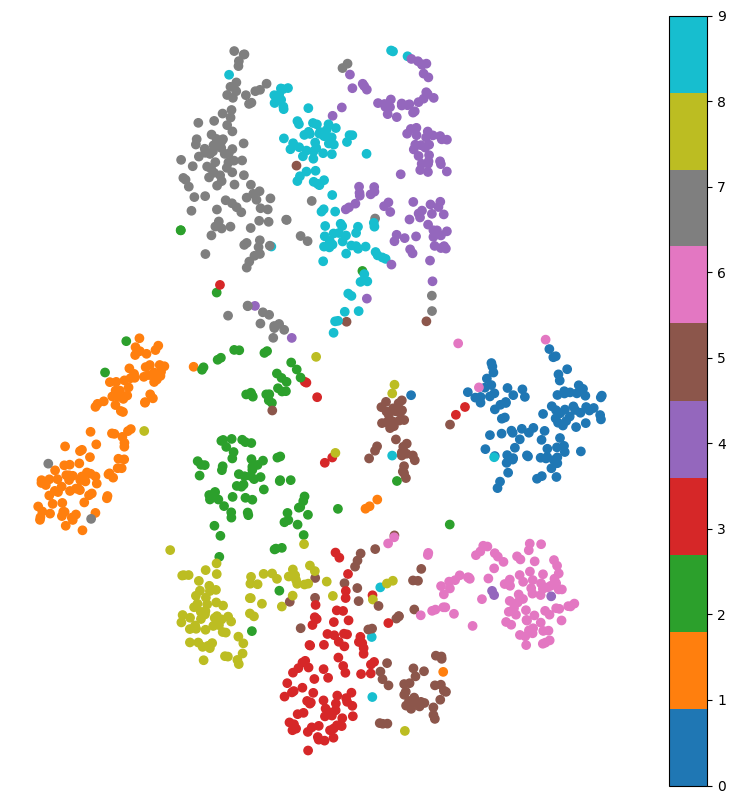

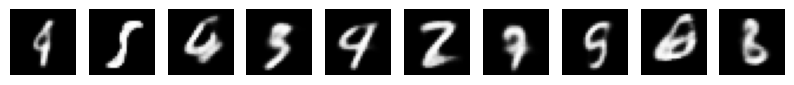

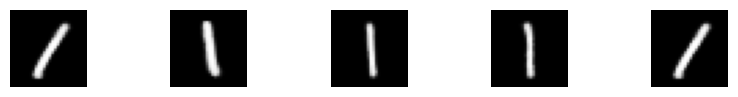

In [28]:
# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
log_interval = 10

# Data loading
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, download=True)
train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True)

# Training loop
def train(epochs):
    model.train()
    train_loss = 0
    for epoch in range(epochs):
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device)
            optimizer.zero_grad()

            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)

            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')

    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

# Train model
start_time = time.time()
train(epochs=20)
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Visualize latent space
def visualize_latent_space():
    model.eval()
    test_loader = DataLoader(mnist_train, batch_size=1000, shuffle=False)
    data, labels = next(iter(test_loader))
    data = data.to(device)

    with torch.no_grad():
        mu, _ = model.encode(data)
        z = mu.cpu().numpy()

    tsne = TSNE(n_components=2)
    z_tsne = tsne.fit_transform(z)

    plt.figure(figsize=(10,10))
    plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=labels, cmap='tab10')
    plt.colorbar()
    plt.axis('off')
    plt.show()

# Generate new images
def generate_images(n_samples=10):
    model.eval()
    with torch.no_grad():
        z = torch.randn(n_samples, 10).to(device)
        samples = model.decode(z).cpu()

    fig = plt.figure(figsize=(10, 1))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(samples[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

# Generate specific digit from stored latent vectors
def generate_digit(target_digit, n_samples=5):
    model.eval()
    digit_samples = []
    digit_loader = DataLoader(mnist_train, batch_size=1)

    # Get latent vectors for target digit
    for data, label in digit_loader:
        if label == target_digit:
            data = data.to(device)
            with torch.no_grad():
                mu, _ = model.encode(data)
                digit_samples.append(mu)
                if len(digit_samples) >= n_samples:
                    break

    # Generate images from latent vectors
    samples = torch.stack(digit_samples)
    with torch.no_grad():
        generated = model.decode(samples).cpu()

    fig = plt.figure(figsize=(10, 1))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(generated[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

visualize_latent_space()
generate_images(10)
generate_digit(1, 5)


## VAE training on fashion mnist

Train Epoch: 0 [0/60000 (0%)]	Loss: 990.250488
Train Epoch: 0 [1280/60000 (2%)]	Loss: 319.702545
Train Epoch: 0 [2560/60000 (4%)]	Loss: 275.042236
Train Epoch: 0 [3840/60000 (6%)]	Loss: 257.081268
Train Epoch: 0 [5120/60000 (9%)]	Loss: 251.626938
Train Epoch: 1 [0/60000 (0%)]	Loss: 251.408157
Train Epoch: 1 [1280/60000 (2%)]	Loss: 247.126785
Train Epoch: 1 [2560/60000 (4%)]	Loss: 247.060333
Train Epoch: 1 [3840/60000 (6%)]	Loss: 248.455399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 240.783264
Train Epoch: 2 [0/60000 (0%)]	Loss: 245.064865
Train Epoch: 2 [1280/60000 (2%)]	Loss: 238.052078
Train Epoch: 2 [2560/60000 (4%)]	Loss: 247.285019
Train Epoch: 2 [3840/60000 (6%)]	Loss: 240.571182
Train Epoch: 2 [5120/60000 (9%)]	Loss: 244.965027
Train Epoch: 3 [0/60000 (0%)]	Loss: 242.495834
Train Epoch: 3 [1280/60000 (2%)]	Loss: 239.385315
Train Epoch: 3 [2560/60000 (4%)]	Loss: 234.764389
Train Epoch: 3 [3840/60000 (6%)]	Loss: 233.556732
Train Epoch: 3 [5120/60000 (9%)]	Loss: 235.220825
Train Epoch:

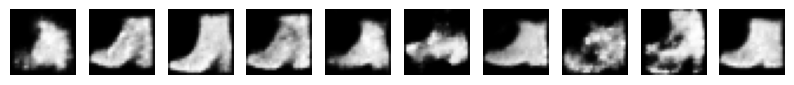

In [10]:
# Generate Fashion-MNIST shoes
fashion_train = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
shoe_indices = (fashion_train.targets == 9)  # Class 9 is Ankle boot
shoe_dataset = torch.utils.data.Subset(fashion_train, torch.where(shoe_indices)[0])
shoe_loader = DataLoader(shoe_dataset, batch_size=128, shuffle=True)

# Train on shoes
def train_fashion():
    model.train()
    train_loss = 0
    for epoch in range(10):
        for batch_idx, (data, _) in enumerate(shoe_loader):
            data = data.to(device)
            optimizer.zero_grad()

            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)

            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')

    print(f'====> Fashion Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

# Execute tasks
start_time = time.time()
train_fashion()
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")
generate_images(10)  # Generate fashion shoes

# Save the world with VAE

our dataset is microsoft-azure-predictive-maintenance. we will use VAE to detect anomalies in the dataset.

In [12]:
!pip install -q opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance')

Dataset URL: https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance


100%|██████████| 31.0M/31.0M [00:00<00:00, 71.3MB/s]


<ipython-input-25-54b88fcd4333>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(data, dtype=torch.float32).clone().detach()


Epoch [1/10], Loss: 200.2551
Epoch [2/10], Loss: 200.1069
Epoch [3/10], Loss: 200.1063
Epoch [4/10], Loss: 200.1062
Epoch [5/10], Loss: 200.1061
Epoch [6/10], Loss: 200.1060
Epoch [7/10], Loss: 200.1060
Epoch [8/10], Loss: 200.1060
Epoch [9/10], Loss: 200.1059
Epoch [10/10], Loss: 200.1059


<ipython-input-25-54b88fcd4333>:130: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomaly_values = sensor_Data_machine[sensor_name].iloc[time_step - 1:][anomaly_indices]


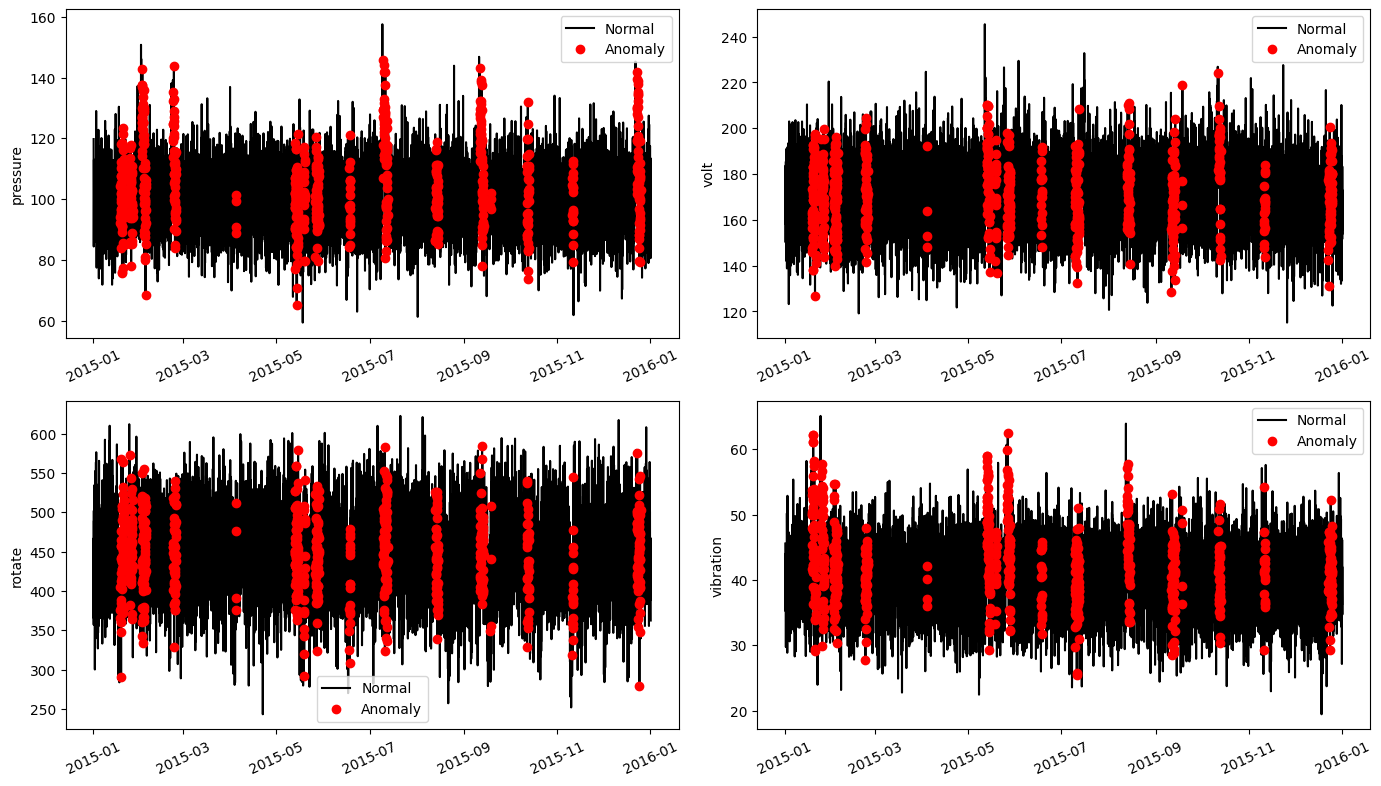

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

# Configuration
TIME_STEP = 50
LATENT_DIM = 2
BATCH_SIZE = 128
EPOCHS = 10
ANOMALY_THRESHOLD = 0.98

# 1. Data Preparation (Assuming data is preprocessed and scaled)
def create_sequences(values, time_step=TIME_STEP):
    output = []
    for i in range(len(values) - time_step + 1):
        output.append(values[i : (i + time_step)])
    return np.stack(output)

class SensorDataset(Dataset):
    def __init__(self, data):
        self.data = torch.tensor(data, dtype=torch.float32).clone().detach()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 2. VAE Model Definition (Without LSTM)
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.fc_mean = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.ReLU()
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, logvar = self.fc_mean(h), self.fc_logvar(h)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_recon = self.decode(z)
        return x_recon, mean, logvar

# 3. Training Loop
def train_vae(vae, dataloader, optimizer, epochs=EPOCHS, device='cpu'):
    vae.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            batch = batch.to(device)
            optimizer.zero_grad()
            x_recon, mean, logvar = vae(batch)
            recon_loss = nn.MSELoss(reduction='sum')(x_recon, batch)
            kl_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
            loss = recon_loss + kl_div
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(dataloader.dataset):.4f}')

# 4. Anomaly Detection
def detect_anomalies(vae, dataloader, device='cpu'):
    vae.eval()
    mse_list = []
    with torch.no_grad():
        for batch in dataloader:
            batch = batch.to(device)
            x_recon, _, _ = vae(batch)
            mse = torch.mean(torch.square(batch - x_recon), dim=1)
            mse_list.append(mse.cpu().numpy())
    return np.concatenate(mse_list)

# 5. Visualization
def visualize_anomalies(sensor_Data_machine, anomaly_scores, time_step=TIME_STEP, anomaly_threshold=ANOMALY_THRESHOLD):
    threshold = np.quantile(anomaly_scores, anomaly_threshold)
    anomalous = anomaly_scores > threshold

    fig, axs = plt.subplots(2, 2, figsize=(14, 8))

    # Ensure sensor_Data_machine is a DataFrame
    if not isinstance(sensor_Data_machine, pd.DataFrame):
        raise ValueError("sensor_Data_machine must be a pandas DataFrame")

    # Anomaly indices
    anomaly_indices = np.where(anomalous)[0]

    # Plotting function
    def plot_sensor_data(ax, sensor_name, color):
        ax.plot(sensor_Data_machine.index, sensor_Data_machine[sensor_name], "k", label="Normal")
        anomaly_times = sensor_Data_machine.index[time_step - 1:][anomaly_indices]
        anomaly_values = sensor_Data_machine[sensor_name].iloc[time_step - 1:][anomaly_indices]
        ax.plot(anomaly_times, anomaly_values, "ro", label="Anomaly")
        ax.set_ylabel(sensor_name)
        ax.tick_params(axis='x', rotation=25)
        ax.legend()

    # Plot each sensor
    plot_sensor_data(axs[0, 0], 'pressure', 'blue')
    plot_sensor_data(axs[1, 0], 'rotate', 'green')
    plot_sensor_data(axs[0, 1], 'volt', 'purple')
    plot_sensor_data(axs[1, 1], 'vibration', 'orange')

    fig.tight_layout(pad=1.2)
    plt.show()

# 6. Main Execution
if __name__ == '__main__':
    sensor_Data = pd.read_csv('microsoft-azure-predictive-maintenance/PdM_telemetry.csv')
    sensor_Data['datetime'] = pd.to_datetime(sensor_Data["datetime"])
    sensor_Data.rename(columns={"datetime": "time"}, inplace=True)
    sensor_Data.set_index('time', inplace=True)
    machine_name = 10
    sensor_Data = sensor_Data.query("machineID == @machine_name")
    sensor_Data_machine = sensor_Data.copy()
    sensor_Data_machine.drop(columns='machineID', inplace=True)
    scaler_auto = StandardScaler()
    np_scaled = scaler_auto.fit_transform(sensor_Data_machine)
    x_train_np = create_sequences(np_scaled)
    x_train = torch.tensor(x_train_np, dtype=torch.float32)

    # Dataset and DataLoader
    sensor_dataset = SensorDataset(x_train)
    dataloader = DataLoader(sensor_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Model, Optimizer, and Device
    input_dim = x_train.shape[2]  # Number of sensor features
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vae = VAE(input_dim, LATENT_DIM).to(device)
    optimizer = optim.Adam(vae.parameters(), lr=1e-3)

    # Train the VAE
    train_vae(vae, dataloader, optimizer, device=device)

    # Detect anomalies
    anomaly_scores = detect_anomalies(vae, dataloader, device=device)

    # Visualize anomalies
    visualize_anomalies(sensor_Data_machine, anomaly_scores)